In [1]:
# Importing Libraries

import numpy as np 
import idx2numpy
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from tabulate import tabulate

In [2]:
# Load Data from file

Image_Dataset = idx2numpy.convert_from_file("train-images.idx3-ubyte")
Label_Dataset = idx2numpy.convert_from_file("train-labels.idx1-ubyte")

# Reshaping Image to (60000,784)
Image_Dataset_Converted = Image_Dataset.reshape(Image_Dataset.shape[0],Image_Dataset.shape[1]*Image_Dataset.shape[2])

# Threshold_Value = 1.75 
Threshold_Value = 1.75 
Threshold_dataset = np.array([(i > Threshold_Value) for i in Image_Dataset_Converted])
print("Threshold =",Threshold_Value)

Threshold = 1.75


In [3]:
# Convert Labels to binary format e.g if label is 5 then [0,0,0,0,0,1,0,0,0,0]
def Convert_Labels_Images(Image, Label):
    
    Label_Update  = []
    for i in Label:
        temp = np.zeros(10)
        temp[i]=1
        Label_Update.append(temp) 
        
    return np.transpose(Image),np.transpose(Label_Update)

In [4]:
# Creating The Class for Single Layer Perceptron.

class Perceptron:
    
    
    def __init__(self, learning_rate=0.01, n_iters=1000):
        # Defining the Learning Rate and Number of Iterations.
        self.lr = learning_rate
        self.n_iters = n_iters


    
    def fit(self, X, y, z1 = None):
        
        # X -- > Training X ||  y -- > Training y || z1 is activation Function either None or sig.
        
        # Function Fit is created to get the final weights for the prediction.
        # It going to show the plot of Mean Square Error Versus Iterations
        # It will get all the Mean Square error after each iteration to array MeanSquare

        # when z1 = 'sig' it will apply sigmoid activation function.
        
        MeanSquare = []
        
        self.weights = np.random.random((10, 784))             

        for _ in range(self.n_iters):
            
            linear_output = np.dot(self.weights,X)
            
            if z1 == 'sig':
                y_predicted = 1 / (1 + np.exp(-linear_output))
            else:
                y_predicted = np.where(linear_output>=0, 1, 0)
            
            update = self.lr * (np.subtract(y,y_predicted))  
            self.weights += np.dot(update,X.T)
            MSE = np.square(np.subtract(y,y_predicted)).mean()
            MeanSquare.append(MSE)
            
            if MSE <= 0.00999:
                break
            
        plt.plot(np.arange(len(MeanSquare)),MeanSquare)
        plt.xlabel('Number of Iterations = {}'.format(len(MeanSquare))) 
        plt.ylabel('Mean Square Error') 
        plt.title('The Mean Square Error Versus Iterations') 
        plt.show()
        
        print("Number of Iteration it took to get lowest Meansqerror =",len(MeanSquare))
        print("When Learning rate =",self.lr)


        
    
    def predict(self, X, z1 = None):
        
        # X -- > Testing X
        
        # It predicts the outcome by wight and activation function.
        # when z1 = 'sig' it will apply sigmoid activation function.
        
        linear_output = np.dot(self.weights, X)
        
        if z1 == 'sig':
            y_predicted = 1 / (1 + np.exp(-linear_output))
        else:
            y_predicted = np.where(linear_output>=0, 1, 0)
        
        return y_predicted
    
    def Plot_Graph(self, X, Y):
        
        # X -- > Testing X || Y --> Testing y
        
        # This Function Simply Plot The Graph of Error percentage for each digit.
        # It will return and show accuracy.
        MSE = [((np.square(np.subtract(X,i).mean()))*100) for i in Y]
        labels = np.arange(len(MSE))
        
        plt.bar(labels, MSE)
        plt.xticks(labels)
        plt.xlabel('Labels') 
        plt.ylabel('Mean Error Percentage') 
        plt.title('Bar Chart of Error %') 
        plt.show()    
        
        accuracy = np.sum(X == Y) / ((X.shape[1])/0.1)
        return accuracy

In [5]:
def Train_Test_Model(Train_Image_start = None, Train_Image_end = None, Test_Image_start = None, Test_Image_end = None, learning_rate = 0.01, n_iters = 800, z1 = None, z2 = None):
    
    if z2 == 'thresh':
        Train_X, Train_y = Convert_Labels_Images(Threshold_dataset[Train_Image_start:Train_Image_end],Label_Dataset[Train_Image_start:Train_Image_end])
        Test_X, Test_y = Convert_Labels_Images(Threshold_dataset[Test_Image_start:Test_Image_end],Label_Dataset[Test_Image_start:Test_Image_end])
    else:
        Train_X, Train_y = Convert_Labels_Images(Image_Dataset_Converted[Train_Image_start:Train_Image_end],Label_Dataset[Train_Image_start:Train_Image_end])
        Test_X, Test_y = Convert_Labels_Images(Image_Dataset_Converted[Test_Image_start:Test_Image_end],Label_Dataset[Test_Image_start:Test_Image_end])
          
    Model = Perceptron(learning_rate = learning_rate, n_iters = n_iters)
    Model.fit(Train_X,Train_y,z1 = z1)
    Predicted = Model.predict(Test_X,z1 = z1)
    Accuracy = Model.Plot_Graph(Test_y,Predicted)
    print('\x1b[1;31m'+'Accuracy = {}'.format(Accuracy)+'\x1b[0m')
    print("Above Chart is for Train_Size = {} and Test_Size = {}".format(Train_Image_end-Train_Image_start,Test_Image_end-Test_Image_start))
    
    return Accuracy

---------------------------------------------------------------------------
Part 1
---------------------------------------------------------------------------
Part 1_1
---------------------------------------------------------------------------
Train Images = 500 || Test Images = 100 || Learning_Rate = 0.1


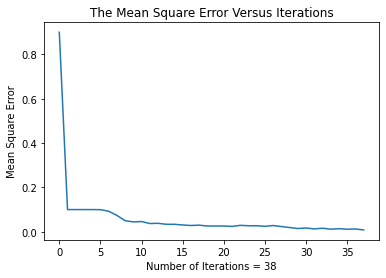

Number of Iteration it took to get lowest Meansqerror = 38
When Learning rate = 0.1


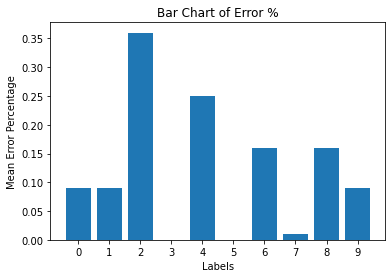

Accuracy = 0.965
Above Chart is for Train_Size = 500 and Test_Size = 100
---------------------------------------------------------------------------
Part 1_2
---------------------------------------------------------------------------
Train Images = 500 || Test Images = 100 || Learning_Rate = 0.01


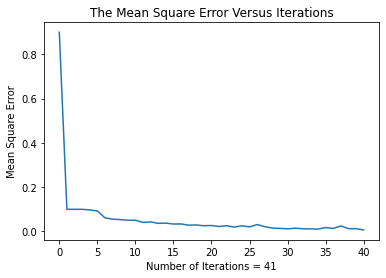

Number of Iteration it took to get lowest Meansqerror = 41
When Learning rate = 0.01


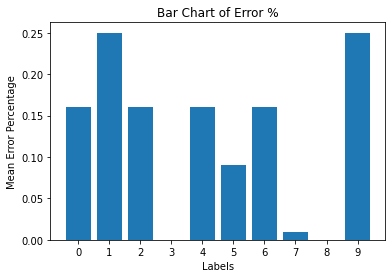

Accuracy = 0.956
Above Chart is for Train_Size = 500 and Test_Size = 100
---------------------------------------------------------------------------
Part 1_3
---------------------------------------------------------------------------
Train Images = 500 || Test Images = 100 || Learning_Rate = 0.001


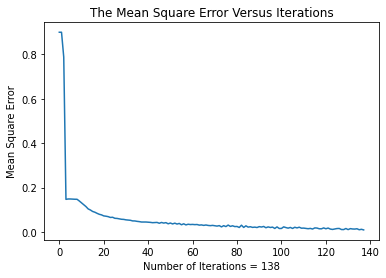

Number of Iteration it took to get lowest Meansqerror = 138
When Learning rate = 0.001


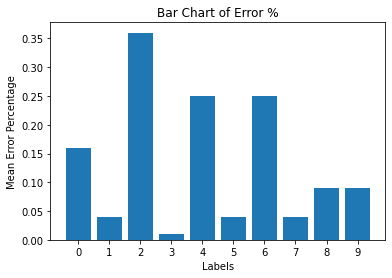

Accuracy = 0.943
Above Chart is for Train_Size = 500 and Test_Size = 100
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Part 2
---------------------------------------------------------------------------
Part 2_1
---------------------------------------------------------------------------
Train Images = 10000 || Test Images = 1000 || Learning_Rate = 0.1


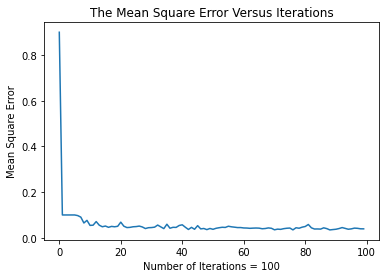

Number of Iteration it took to get lowest Meansqerror = 100
When Learning rate = 0.1


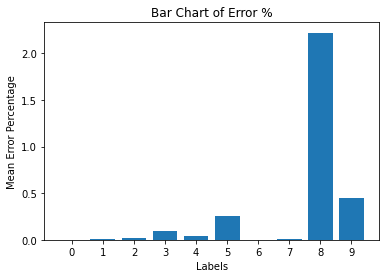

Accuracy = 0.95
Above Chart is for Train_Size = 10000 and Test_Size = 1000
---------------------------------------------------------------------------
Part 2_2
---------------------------------------------------------------------------
Train Images = 10000 || Test Images = 1000 || Learning_Rate = 0.01


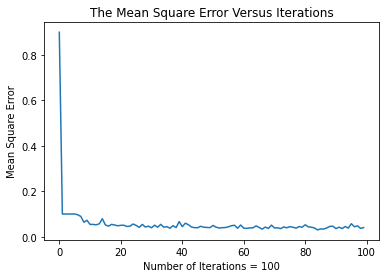

Number of Iteration it took to get lowest Meansqerror = 100
When Learning rate = 0.01


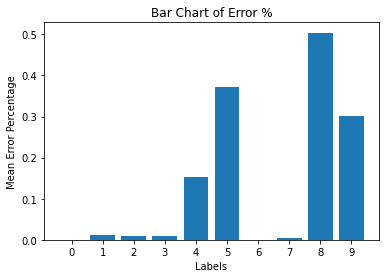

Accuracy = 0.9612
Above Chart is for Train_Size = 10000 and Test_Size = 1000
---------------------------------------------------------------------------
Part 2_3
---------------------------------------------------------------------------
Train Images = 10000 || Test Images = 1000 || Learning_Rate = 0.001


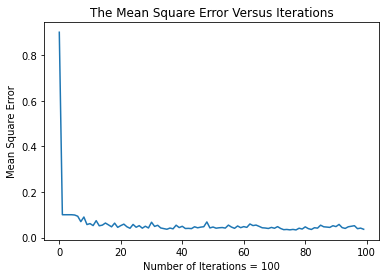

Number of Iteration it took to get lowest Meansqerror = 100
When Learning rate = 0.001


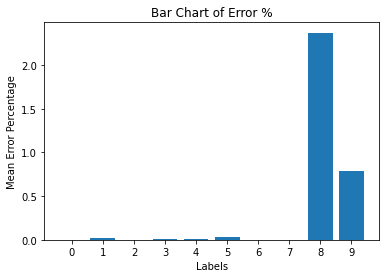

Accuracy = 0.9501
Above Chart is for Train_Size = 10000 and Test_Size = 1000
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Part 3 --- Sigmoid
---------------------------------------------------------------------------
Part 3_1
---------------------------------------------------------------------------
Train Images = 10000 || Test Images = 1000 || Learning_Rate = 0.1


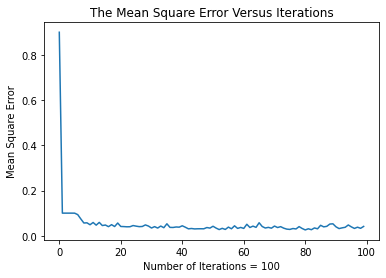

Number of Iteration it took to get lowest Meansqerror = 100
When Learning rate = 0.1


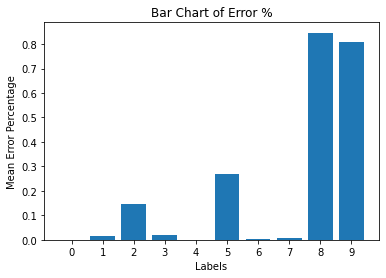

Accuracy = 0.9583
Above Chart is for Train_Size = 10000 and Test_Size = 1000
---------------------------------------------------------------------------
Part 3_2
---------------------------------------------------------------------------
Train Images = 10000 || Test Images = 1000 || Learning_Rate = 0.01


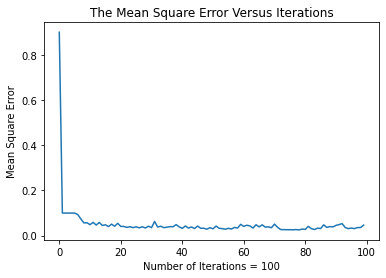

Number of Iteration it took to get lowest Meansqerror = 100
When Learning rate = 0.01


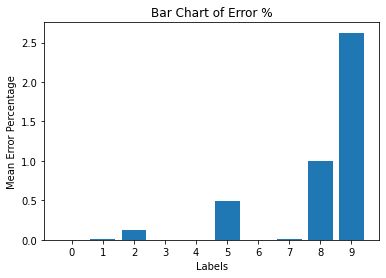

Accuracy = 0.9519
Above Chart is for Train_Size = 10000 and Test_Size = 1000
---------------------------------------------------------------------------
Part 3_3
---------------------------------------------------------------------------
Train Images = 10000 || Test Images = 1000 || Learning_Rate = 0.001


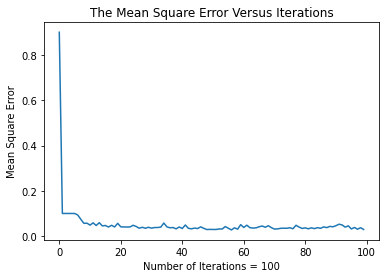

Number of Iteration it took to get lowest Meansqerror = 100
When Learning rate = 0.001


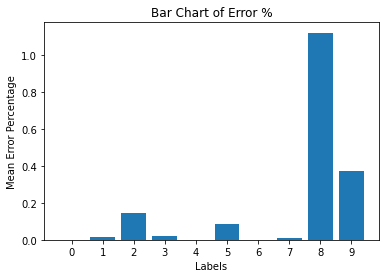

Accuracy = 0.958
Above Chart is for Train_Size = 10000 and Test_Size = 1000
---------------------------------------------------------------------------


In [6]:
warnings.filterwarnings('ignore')
print('-' * 75)
print('\x1b[1;31m'+'Part 1'+'\x1b[0m')
print('-' * 75)

print('\x1b[1;31m'+'Part 1_1'+'\x1b[0m')
print('-' * 75)
print('\x1b[1;31m'+'Train Images = 500 || Test Images = 100 || Learning_Rate = 0.1'+'\x1b[0m')
Accuracy_1_1 = Train_Test_Model(0,500,10000,10100, learning_rate = 0.1, n_iters = 750, z2 = 'thresh')
print('-' * 75)

print('\x1b[1;31m'+'Part 1_2'+'\x1b[0m')
print('-' * 75)
print('\x1b[1;31m'+'Train Images = 500 || Test Images = 100 || Learning_Rate = 0.01'+'\x1b[0m')
Accuracy_1_2 = Train_Test_Model(0,500,10000,10100, learning_rate = 0.01, n_iters = 750, z2 = 'thresh')
print('-' * 75)

print('\x1b[1;31m'+'Part 1_3'+'\x1b[0m')
print('-' * 75)
print('\x1b[1;31m'+'Train Images = 500 || Test Images = 100 || Learning_Rate = 0.001'+'\x1b[0m')
Accuracy_1_3 = Train_Test_Model(0,500,10000,10100, learning_rate = 0.001, n_iters = 750, z2 = 'thresh')
print('-' * 75)

print('-' * 75)
print('\x1b[1;31m'+'Part 2'+'\x1b[0m')
print('-' * 75)

print('\x1b[1;31m'+'Part 2_1'+'\x1b[0m')
print('-' * 75)
print('\x1b[1;31m'+'Train Images = 10000 || Test Images = 1000 || Learning_Rate = 0.1'+'\x1b[0m')
Accuracy_2_1 = Train_Test_Model(0,10000,20000,21000, learning_rate = 0.1, n_iters = 100, z2 = 'thresh')
print('-' * 75)

print('\x1b[1;31m'+'Part 2_2'+'\x1b[0m')
print('-' * 75)
print('\x1b[1;31m'+'Train Images = 10000 || Test Images = 1000 || Learning_Rate = 0.01'+'\x1b[0m')
Accuracy_2_2 = Train_Test_Model(0,10000,20000,21000, learning_rate = 0.01, n_iters = 100, z2 = 'thresh')
print('-' * 75)

print('\x1b[1;31m'+'Part 2_3'+'\x1b[0m')
print('-' * 75)
print('\x1b[1;31m'+'Train Images = 10000 || Test Images = 1000 || Learning_Rate = 0.001'+'\x1b[0m')
Accuracy_2_3 = Train_Test_Model(0,10000,20000,21000, learning_rate = 0.001, n_iters = 100, z2 = 'thresh')
print('-' * 75)

print('-' * 75)
print('\x1b[1;31m'+'Part 3 --- Sigmoid'+'\x1b[0m')
print('-' * 75)

print('\x1b[1;31m'+'Part 3_1'+'\x1b[0m')
print('-' * 75)
print('\x1b[1;31m'+'Train Images = 10000 || Test Images = 1000 || Learning_Rate = 0.1'+'\x1b[0m')
Accuracy_3_1 = Train_Test_Model(0,10000,20000,21000, learning_rate = 0.1, n_iters = 100, z1 = 'sig')
print('-' * 75)

print('\x1b[1;31m'+'Part 3_2'+'\x1b[0m')
print('-' * 75)
print('\x1b[1;31m'+'Train Images = 10000 || Test Images = 1000 || Learning_Rate = 0.01'+'\x1b[0m')
Accuracy_3_2 = Train_Test_Model(0,10000,20000,21000, learning_rate = 0.01, n_iters = 100, z1 = 'sig')
print('-' * 75)

print('\x1b[1;31m'+'Part 3_3'+'\x1b[0m')
print('-' * 75)
print('\x1b[1;31m'+'Train Images = 10000 || Test Images = 1000 || Learning_Rate = 0.001'+'\x1b[0m')
Accuracy_3_3 = Train_Test_Model(0,10000,20000,21000, learning_rate = 0.001, n_iters = 100, z1 = 'sig')
print('-' * 75)

In [7]:
Part = ["Accuracy Part 1 - 1 Threshold Normal","Accuracy Part 1 - 2 Threshold Normal",
        "Accuracy Part 1 - 3 Threshold Normal","Accuracy Part 2 - 1 Threshold Normal",
        "Accuracy Part 2 - 2 Threshold Normal","Accuracy Part 2 - 3 Threshold Normal",
        "Accuracy Part 3 - 1 Non-Threshold Sigmoid","Accuracy Part 3 - 2 Non-Threshold Sigmoid",
        "Accuracy Part 3 - 3 Non-Threshold Sigmoid",]

Train_Size = [500,500,500,10000,10000,10000,10000,10000,10000]
Test_Size = [100,100,100,1000,1000,1000,1000,1000,1000]
Accuracy = [Accuracy_1_1,Accuracy_1_2,Accuracy_1_3,Accuracy_2_1,Accuracy_2_2,Accuracy_2_3,Accuracy_3_1,Accuracy_3_2,Accuracy_3_3]
Error = [1-i for i in Accuracy]

Compare = ["Part 1","Part 2","Part 3","Part 5"]
Compare_Ac = [0.91, 0.97, 0.962, 0.952]
Compare_Er = [1-i for i in Compare_Ac]

df1 = pd.DataFrame({
    'Part' : Compare,
    'Accuracy' : Compare_Ac,
    'Error' : Compare_Er})

df = pd.DataFrame({
    'Part' : Part,
    'Train_Size' : Train_Size,
    'Test_Size' : Test_Size,
    'Accuracy' : Accuracy,
    'Error' : Error})

print(tabulate(df, headers='keys', tablefmt='fancy_grid'))
print(tabulate(df1, headers='keys', tablefmt='fancy_grid'))

╒════╤═══════════════════════════════════════════╤══════════════╤═════════════╤════════════╤═════════╕
│    │ Part                                      │   Train_Size │   Test_Size │   Accuracy │   Error │
╞════╪═══════════════════════════════════════════╪══════════════╪═════════════╪════════════╪═════════╡
│  0 │ Accuracy Part 1 - 1 Threshold Normal      │          500 │         100 │     0.965  │  0.035  │
├────┼───────────────────────────────────────────┼──────────────┼─────────────┼────────────┼─────────┤
│  1 │ Accuracy Part 1 - 2 Threshold Normal      │          500 │         100 │     0.956  │  0.044  │
├────┼───────────────────────────────────────────┼──────────────┼─────────────┼────────────┼─────────┤
│  2 │ Accuracy Part 1 - 3 Threshold Normal      │          500 │         100 │     0.943  │  0.057  │
├────┼───────────────────────────────────────────┼──────────────┼─────────────┼────────────┼─────────┤
│  3 │ Accuracy Part 2 - 1 Threshold Normal      │        10000 │        